In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/IMDB_Dataset.csv')

In [18]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


# Data Preprocessing

In [16]:
data.shape

(49582, 2)

In [3]:
data.duplicated().sum()

418

In [4]:
data = data.drop_duplicates()

In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [17]:
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x=="negative" else 0)

### Text Preprocessing

In [19]:
import re
import string

##### 1.Convert Upper to Lower

In [20]:
data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [21]:
data['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

##### 2.Remove Links

In [22]:
data['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [23]:
data['review'] = data['review'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '' ,x, flags=re.MULTILINE) for x in x.split()))

In [24]:
data['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

##### 3.Remove Punctuations

In [25]:
data['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [26]:
data['review'] = data['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [27]:
data['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

##### 4.remove numbers

In [28]:
data['review'] = data['review'].str.replace('\d+','',regex=True)

In [29]:
data['review'].tail()

49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, dtype: object

In [11]:
data['review'] = data['review'].str.replace('br','')

##### 5.Remove stopwords

In [19]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import nltk

In [21]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [33]:
data['review'].head()

0    one reviewers mentioned watching oz episode yo...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

##### 6.Stemming

In [34]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [35]:
data['review'] = data['review'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [36]:
data['review'].head()

0    one review mention watch oz episod youll hook ...
1    wonder littl product br br film techniqu unass...
2    thought wonder way spend time hot summer weeke...
3    basic there famili littl boy jake think there ...
4    petter mattei love time money visual stun film...
Name: review, dtype: object

In [37]:
data.to_csv('../artifacts/imdb_preprocessed.csv', index=False)

In [6]:
data = pd.read_csv("../artifacts/imdb_preprocessed.csv")

## Vocabulary Building

In [7]:
data

,review,sentiment
0,one review mention watch oz episod youll hook ...,0
1,wonder littl product br br film techniqu unass...,0
2,thought wonder way spend time hot summer weeke...,0
3,basic there famili littl boy jake think there ...,1
4,petter mattei love time money visual stun film...,0
...,...,...
49577,thought movi right good job wasnt creativ orig...,0
49578,bad plot bad dialogu bad act idiot direct anno...,1
49579,cathol taught parochi elementari school nun ta...,1
49580,im go disagre previou comment side maltin one ...,1


In [35]:
from collections import Counter
vocab = Counter()

In [37]:
for sentence in data['review']:
    vocab.update(sentence.split())

In [14]:
data['review'] = data['review'].str.replace('br','')

In [38]:
vocab

Counter({'movi': 98234,
         'film': 93012,
         'one': 53360,
         'like': 43698,
         'time': 30253,
         'good': 29129,
         'make': 28445,
         'get': 27569,
         'see': 27562,
         'charact': 27371,
         'watch': 27221,
         'even': 24846,
         'stori': 24115,
         'would': 23838,
         'realli': 22782,
         'scene': 20757,
         'well': 19597,
         'show': 19377,
         'look': 19163,
         'much': 18944,
         'end': 18382,
         'great': 18055,
         'bad': 17889,
         'peopl': 17885,
         'also': 17735,
         'go': 17669,
         'love': 17635,
         'think': 17263,
         'first': 17061,
         'play': 16924,
         'dont': 16788,
         'way': 16755,
         'act': 16731,
         'thing': 16119,
         'made': 15417,
         'could': 15035,
         'know': 14883,
         'say': 14734,
         'seem': 13984,
         'mani': 13328,
         'work': 13284,
         's

In [45]:
tokens = [key for key in vocab if vocab[key] > 2000]

In [46]:
tokens

['one',
 'review',
 'mention',
 'watch',
 'episod',
 'youll',
 'right',
 'happen',
 'first',
 'thing',
 'scene',
 'set',
 'word',
 'go',
 'show',
 'heart',
 'sex',
 'classic',
 'use',
 'call',
 'given',
 'state',
 'citi',
 'face',
 'high',
 'home',
 'death',
 'deal',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'fact',
 'goe',
 'wouldnt',
 'pretti',
 'pictur',
 'audienc',
 'doesnt',
 'around',
 'ever',
 'saw',
 'couldnt',
 'develop',
 'got',
 'level',
 'kill',
 'order',
 'get',
 'well',
 'turn',
 'lack',
 'experi',
 'may',
 'becom',
 'touch',
 'side',
 'wonder',
 'littl',
 'product',
 'film',
 'give',
 'sometim',
 'sens',
 'entir',
 'piec',
 'actor',
 'extrem',
 'michael',
 'voic',
 'truli',
 'see',
 'edit',
 'worth',
 'written',
 'perform',
 'great',
 'comedi',
 'life',
 'realli',
 'come',
 'rather',
 'play',
 'particularli',
 'everi',
 'terribl',
 'done',
 'thought',
 'way',
 'time',
 'sit',
 'plot',
 'dialogu',
 'charact',
 'even',
 'killer',
 'disappoint',
 'realiz',
 'po

In [47]:
len(tokens)

533

In [48]:
def save_vocab(lines,filename):
    data = '\n'.join(lines)
    file = open(filename , 'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocab(tokens, '../static/model/imdb_vocabulary.txt')

## Dataset Split

In [49]:
X = data['review']
y = data['sentiment']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)

## Vectorization

In [51]:
def vectorizer(df, vocabulary):
    vectorized_lst = []

    for sentence in df:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        vectorized_lst.append(sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new
    

In [52]:
vect_x_train = vectorizer(X_train, tokens)

In [53]:
vect_x_train.shape

(39665, 533)

In [54]:
vect_x_test = vectorizer(X_test, tokens)

In [56]:
vect_x_test.shape

(9917, 533)

<Axes: xlabel='sentiment'>

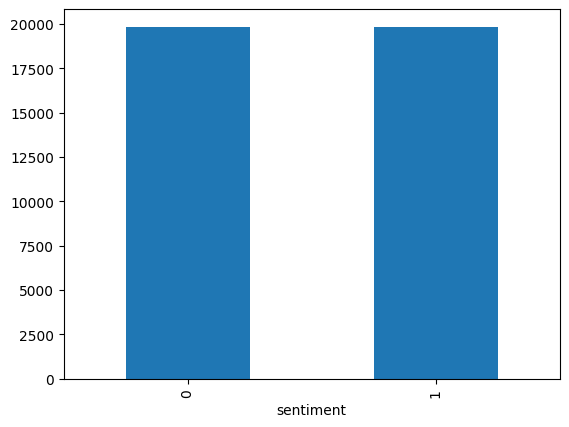

In [57]:
y_train.value_counts().plot(kind='bar')

In [45]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vect_x_train_smt, y_train_smt = smote.fit_resample(vect_x_train,y_train)

# Model Training And Evaluation

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

### Logistic Regression

In [64]:
lr = LogisticRegression()
lr.fit(vect_x_train, y_train)

y_train_pred = lr.predict(vect_x_train)

training_scores(y_train, y_train_pred)

y_test_pred = lr.predict(vect_x_test)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.852
	Precision = 0.86
	Recall = 0.841
	F1-Score = 0.85
Testing Scores:
	Accuracy = 0.846
	Precision = 0.849
	Recall = 0.835
	F1-Score = 0.842


### Naive Bayes

In [67]:
mnb = MultinomialNB()
mnb.fit(vect_x_train, y_train)

y_train_pred = mnb.predict(vect_x_train)

training_scores(y_train, y_train_pred)

y_test_pred = mnb.predict(vect_x_test)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.825
	Precision = 0.829
	Recall = 0.818
	F1-Score = 0.823
Testing Scores:
	Accuracy = 0.829
	Precision = 0.829
	Recall = 0.822
	F1-Score = 0.825


### Desicion Tree

In [51]:
dt = DecisionTreeClassifier()
dt.fit(vect_x_train_smt, y_train_smt)

y_train_pred = dt.predict(vect_x_train_smt)

training_scores(y_train_smt, y_train_pred)

y_test_pred = dt.predict(vect_x_test)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.996
	Precision = 0.997
	Recall = 0.994
	F1-Score = 0.996
Testing Scores:
	Accuracy = 0.807
	Precision = 0.607
	Recall = 0.588
	F1-Score = 0.597


### SVC

In [ ]:
svc = SVC()
svc.fit(vect_x_train, y_train)

y_train_pred = svc.predict(vect_x_train)

training_scores(y_train, y_train_pred)

y_test_pred = svc.predict(vect_x_test)

validation_scores(y_test, y_test_pred)

## Save Model

In [68]:
import pickle

with open("../static/model/imdb_lr_model.pickle", 'wb') as file:
    pickle.dump(lr, file)